C:\Users\USM8KOR\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Mean Squared Error (Degree 1): 9.2833129781992


Mean Squared Error (Degree 2): 1.0888596852687282


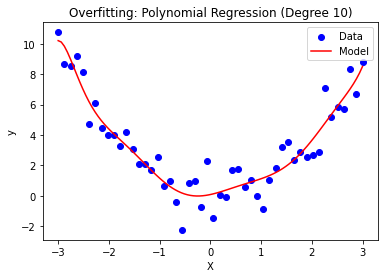

Mean Squared Error (Degree 10): 1.0347182852225643


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Step 1: Create a custom dataset
np.random.seed(0)
X = np.linspace(-3, 3, 50)
y = X**2 + np.random.normal(0, 1, 50)  # Quadratic function with noise
data = pd.DataFrame({'X': X, 'y': y})

# Step 2: Underfitting and Overfitting

# Function to plot the results
def plot_model(X, y, model, poly, title):
    plt.scatter(X, y, color='blue', label='Data')
    X_plot = np.linspace(-3, 3, 100)
    X_plot_poly = poly.transform(X_plot.reshape(-1, 1))
    plt.plot(X_plot, model.predict(X_plot_poly), color='red', label='Model')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Linear regression (underfitting)
poly1 = PolynomialFeatures(degree=1)
X_poly1 = poly1.fit_transform(X.reshape(-1, 1))
model1 = LinearRegression().fit(X_poly1, y)
plot_model(X, y, model1, poly1, 'Underfitting: Linear Regression (Degree 1)')
print("Mean Squared Error (Degree 1):", mean_squared_error(y, model1.predict(X_poly1)))

# Quadratic regression (good fit)
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X.reshape(-1, 1))
model2 = LinearRegression().fit(X_poly2, y)
plot_model(X, y, model2, poly2, 'Good Fit: Quadratic Regression (Degree 2)')
print("Mean Squared Error (Degree 2):", mean_squared_error(y, model2.predict(X_poly2)))

# High-degree polynomial regression (overfitting)
poly10 = PolynomialFeatures(degree=10)
X_poly10 = poly10.fit_transform(X.reshape(-1, 1))
model10 = LinearRegression().fit(X_poly10, y)
plot_model(X, y, model10, poly10, 'Overfitting: Polynomial Regression (Degree 10)')
print("Mean Squared Error (Degree 10):", mean_squared_error(y, model10.predict(X_poly10)))

C:\Users\USM8KOR\AppData\Local\Temp/ipykernel_17492/1026827947.py:23: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='autumn', marker='x', edgecolor='k', label='Testing data')


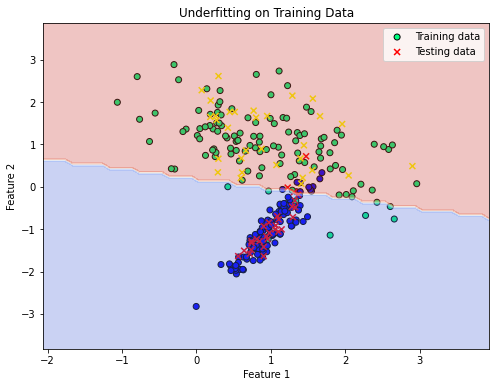

C:\Users\USM8KOR\AppData\Local\Temp/ipykernel_17492/1026827947.py:23: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='autumn', marker='x', edgecolor='k', label='Testing data')


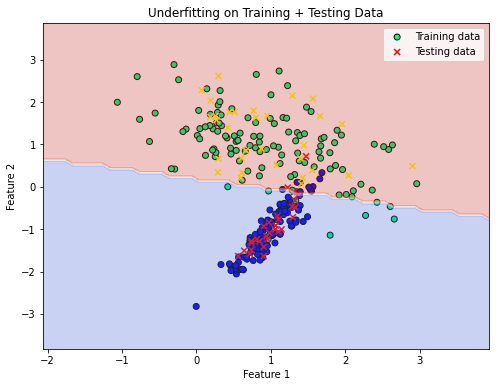

C:\Users\USM8KOR\AppData\Local\Temp/ipykernel_17492/1026827947.py:23: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='autumn', marker='x', edgecolor='k', label='Testing data')


Training Accuracy (Degree 1): 0.9166666666666666
Testing Accuracy (Degree 1): 0.9666666666666667


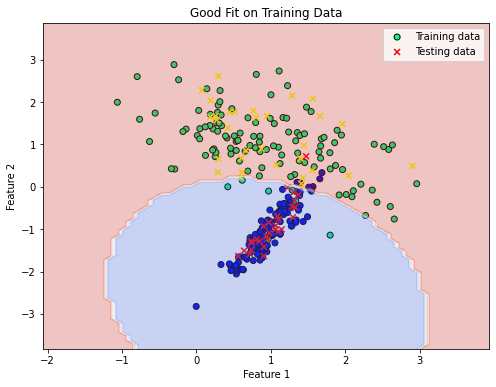

C:\Users\USM8KOR\AppData\Local\Temp/ipykernel_17492/1026827947.py:23: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='autumn', marker='x', edgecolor='k', label='Testing data')


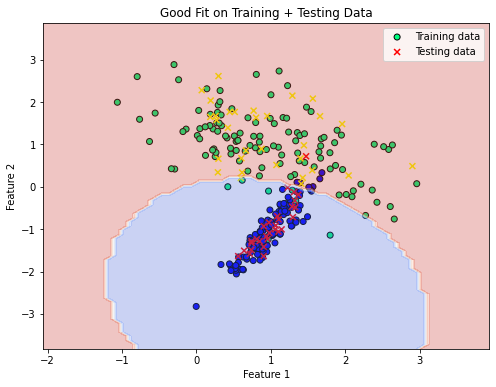

C:\Users\USM8KOR\AppData\Local\Temp/ipykernel_17492/1026827947.py:23: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='autumn', marker='x', edgecolor='k', label='Testing data')


Training Accuracy (Degree 2): 0.9375
Testing Accuracy (Degree 2): 0.9833333333333333


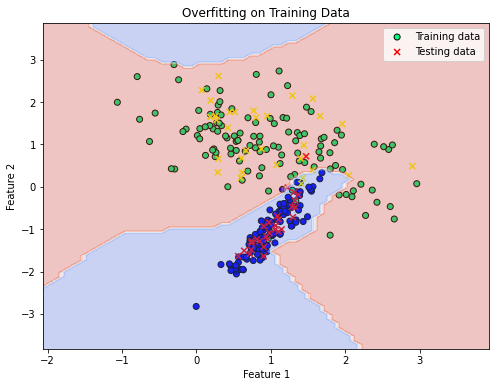

C:\Users\USM8KOR\AppData\Local\Temp/ipykernel_17492/1026827947.py:23: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='autumn', marker='x', edgecolor='k', label='Testing data')


Training Accuracy (Degree 10): 0.9791666666666666
Testing Accuracy (Degree 10): 0.95


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a complex non-linear classification dataset
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=1.0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot the results
def plot_classification(X_train, y_train, X_test, y_test, model, poly, title):
    plt.figure(figsize=(8, 6))
    
    # Plot training data
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter', marker='o', edgecolor='k', label='Training data')
    
    # Plot testing data
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='autumn', marker='x', edgecolor='k', label='Testing data')
    
    # Create a mesh grid for plotting decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly).reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, y_plot, alpha=0.3, cmap='coolwarm')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Underfitting (linear classification)
poly1 = PolynomialFeatures(degree=1)
X_train_poly1 = poly1.fit_transform(X_train)
X_test_poly1 = poly1.transform(X_test)
model1 = LogisticRegression().fit(X_train_poly1, y_train)

plot_classification(X_train, y_train, X_test, y_test, model1, poly1, 'Underfitting on Training Data')
plot_classification(X_train, y_train, X_test, y_test, model1, poly1, 'Underfitting on Training + Testing Data')
print("Training Accuracy (Degree 1):", accuracy_score(y_train, model1.predict(X_train_poly1)))
print("Testing Accuracy (Degree 1):", accuracy_score(y_test, model1.predict(X_test_poly1)))

# Good fit (quadratic classification)
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)
model2 = LogisticRegression().fit(X_train_poly2, y_train)

plot_classification(X_train, y_train, X_test, y_test, model2, poly2, 'Good Fit on Training Data')
plot_classification(X_train, y_train, X_test, y_test, model2, poly2, 'Good Fit on Training + Testing Data')
print("Training Accuracy (Degree 2):", accuracy_score(y_train, model2.predict(X_train_poly2)))
print("Testing Accuracy (Degree 2):", accuracy_score(y_test, model2.predict(X_test_poly2)))

# Overfitting (high-degree classification)
poly10 = PolynomialFeatures(degree=10)
X_train_poly10 = poly10.fit_transform(X_train)
X_test_poly10 = poly10.transform(X_test)
model10 = LogisticRegression(max_iter=10000).fit(X_train_poly10, y_train)

plot_classification(X_train, y_train, X_test, y_test, model10, poly10, 'Overfitting on Training Data')
plot_classification(X_train, y_train, X_test, y_test, model10, poly10, 'Overfitting on Training + Testing Data')
print("Training Accuracy (Degree 10):", accuracy_score(y_train, model10.predict(X_train_poly10)))
print("Testing Accuracy (Degree 10):", accuracy_score(y_test, model10.predict(X_test_poly10)))
